In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))


Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Sklearn: 1.2.2
Matplotlib: 3.7.1
NumPy: 1.25.2


Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


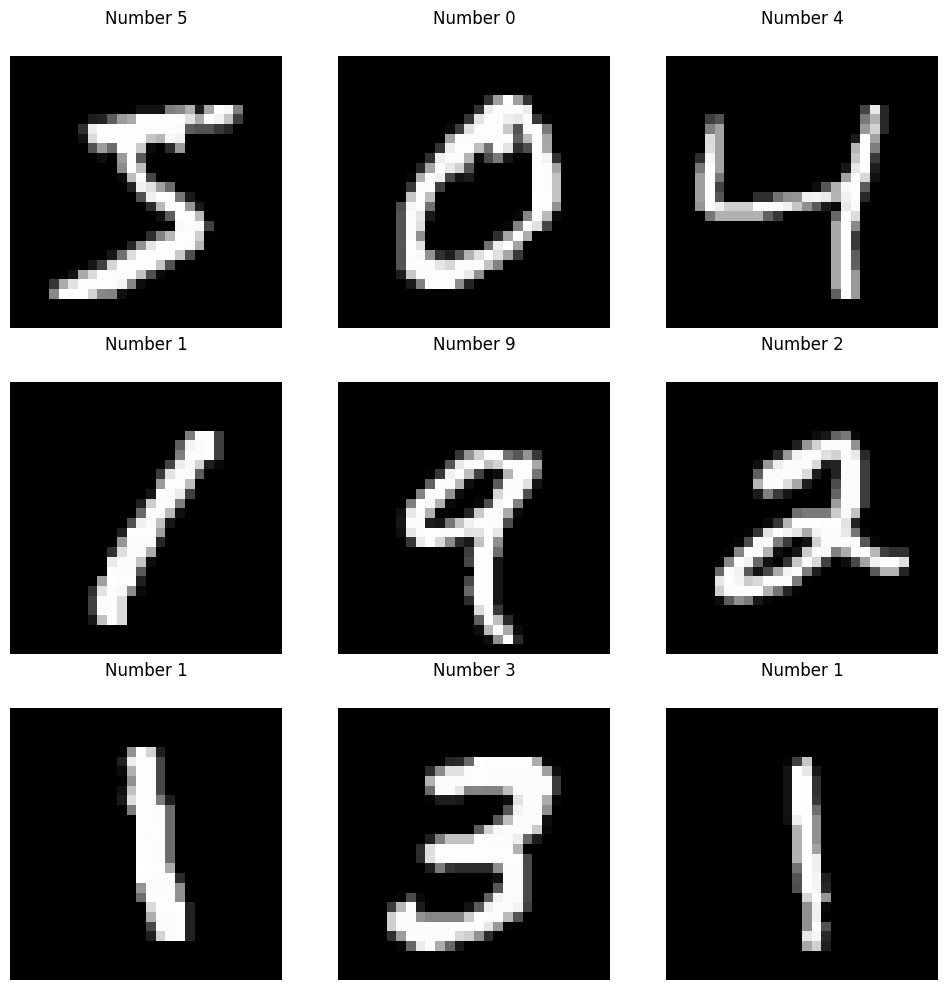

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))


print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))


fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

plt.show()


In [ ]:
# 1-dimensional array
X = x_train.reshape(len(x_train), -1)
Y = y_train

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)


(60000, 784)
(784,)


In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize
kmeans = MiniBatchKMeans(n_clusters=n_digits)

#Train
kmeans.fit(X)


cluster_labels = kmeans.labels_
print(cluster_labels)


10
[9 6 5 ... 2 7 2]


In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        # index in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # each point cluster
        labels.append(actual_labels[index])

        # common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))


        if np.argmax(counts) in inferred_labels:

            inferred_labels[np.argmax(counts)].append(i)
        else:

            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_clusters, cluster_labels):
    # Convert cluster_labels array to a list of lists
    cluster_labels_list = [list(cluster_labels[i]) for i in range(len(cluster_labels))]

    # Initialize an empty array to store predicted labels
    predicted_labels = np.zeros(len(X_clusters), dtype=np.uint8)

    # Iterate over each data point and assign the predicted label
    for i, cluster in enumerate(X_clusters):
        for j, value in enumerate(cluster_labels_list):
            if cluster in value:
                predicted_labels[i] = j
                break

    return predicted_labels




cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.labels_
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


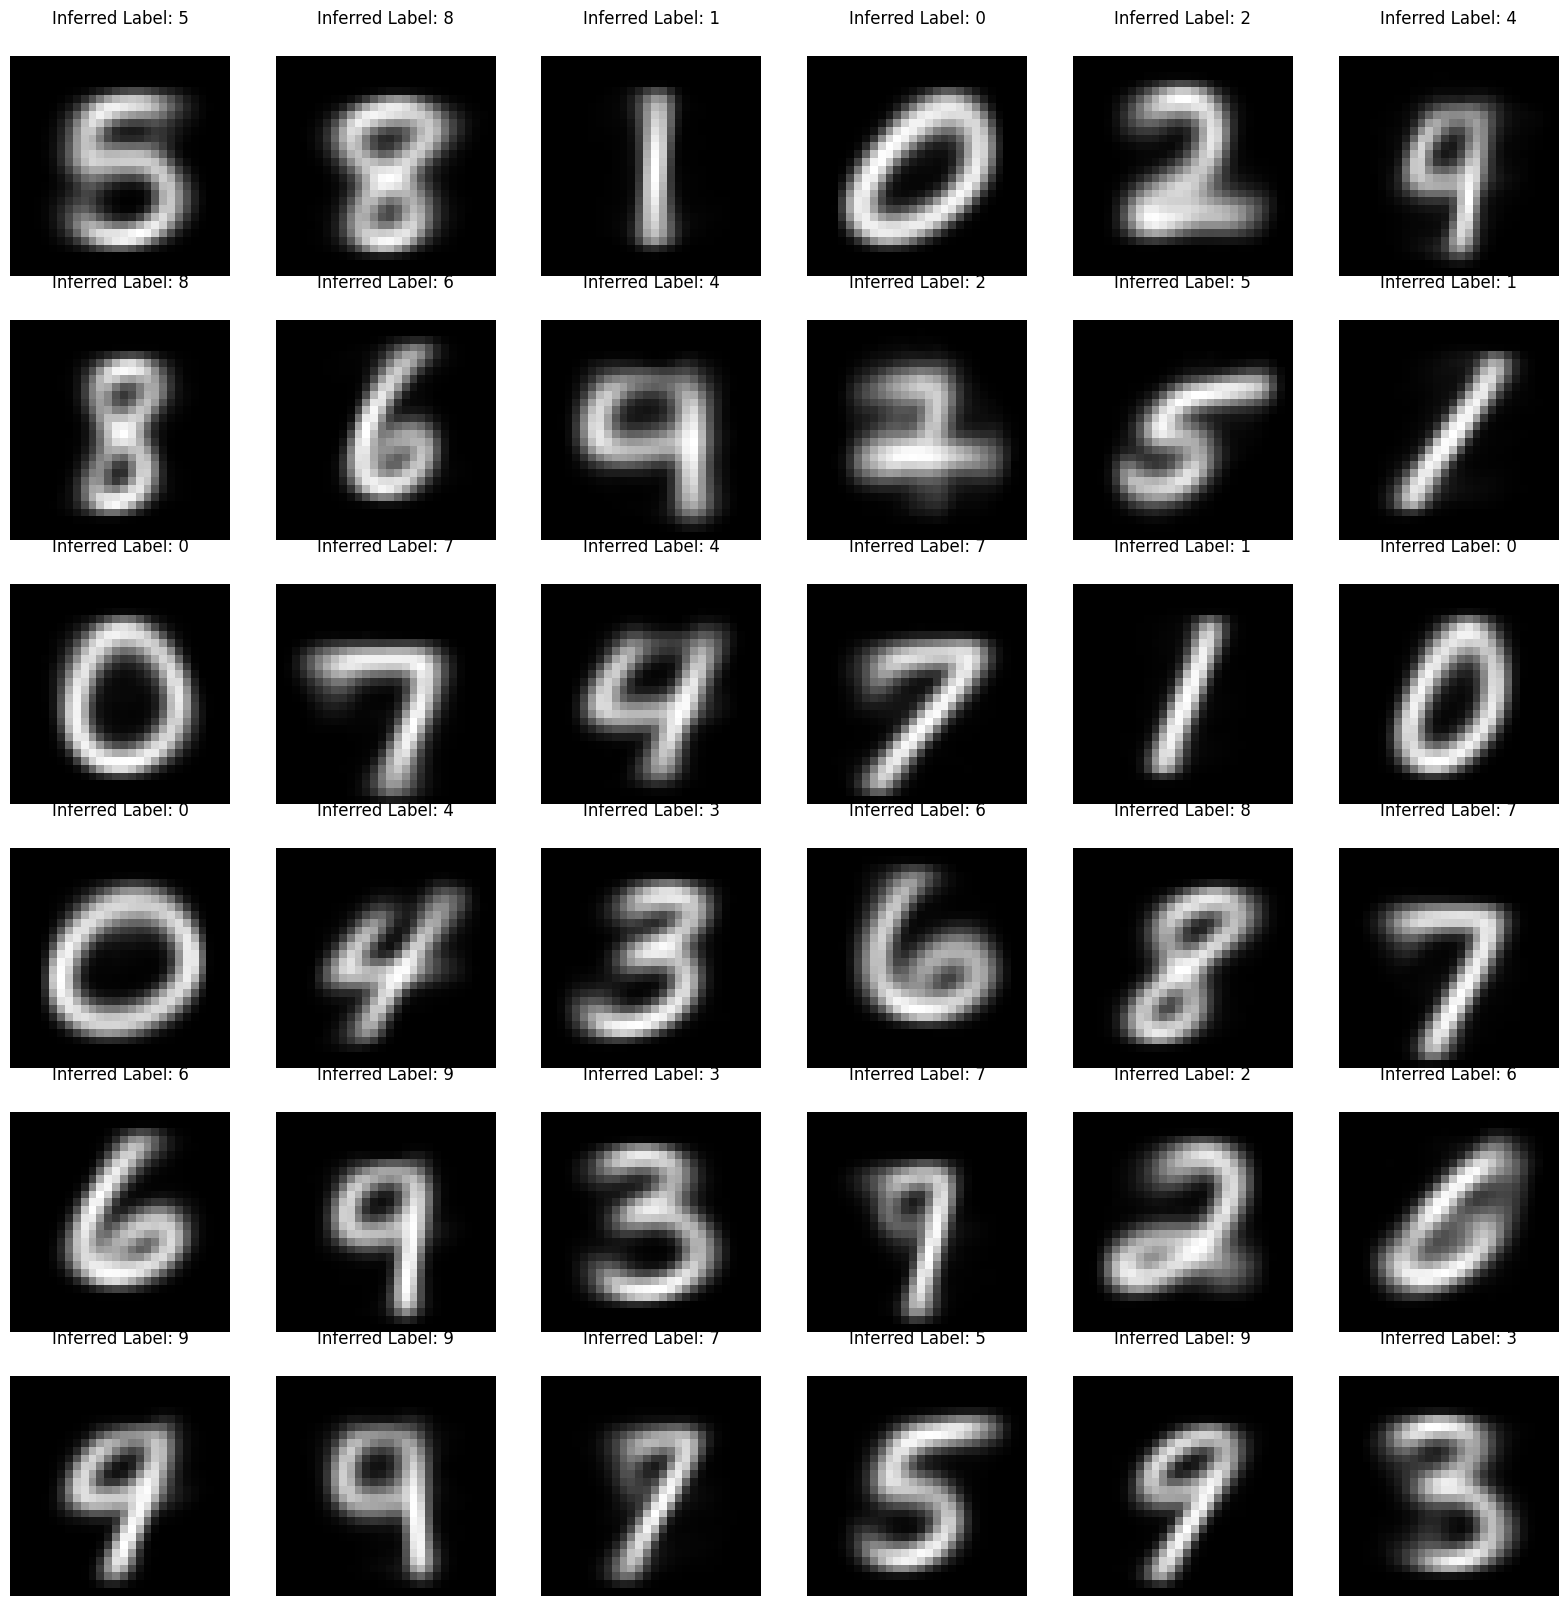

In [ ]:

kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):

    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))

    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

# display the figure
fig.show()




In [ ]:

predicted_labels_test = kmeans.predict(x_test.reshape(len(x_test), -1))


predicted_data_labels_test = infer_data_labels(predicted_labels_test, cluster_labels)


accuracy_test = metrics.accuracy_score(y_test, predicted_data_labels_test)

print('Accuracy: {}\n'.format(accuracy_test))


Accuracy: 0.7982



As we can see the accuracy is 0.79 and its a very decent score and from the visualization we can see that it reflects there. For better performance we can optimize the hyper parameters, tinker with the features and do better cluster interpretations. Overall I am satisfied with these results for my first cluster homework! Very exciting!